In [1]:
import NotebookImport
from DX_by_cancer_short import *

importing IPython notebook from DX_by_cancer_short

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from Setup/DX_Imports

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../DX/Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


importing IPython notebook from Immune_Stroma_Scoring

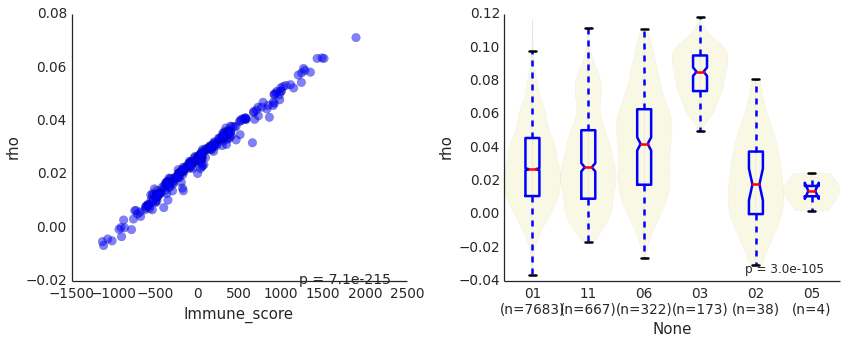

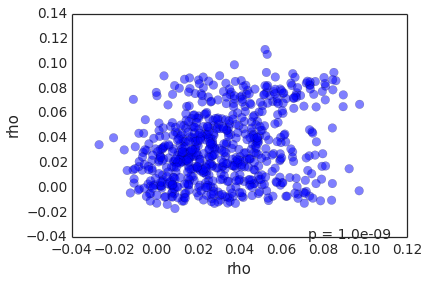

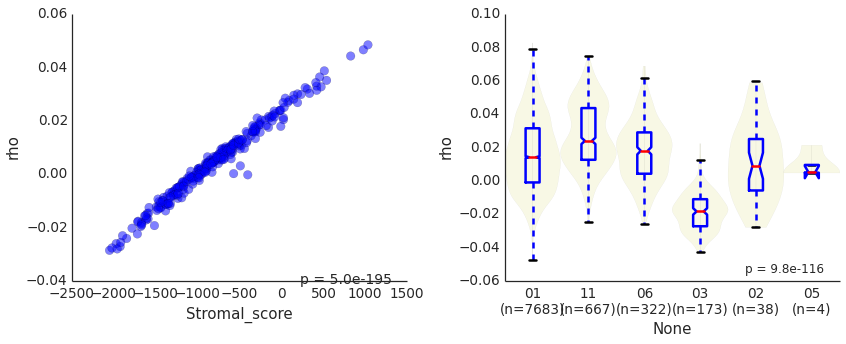

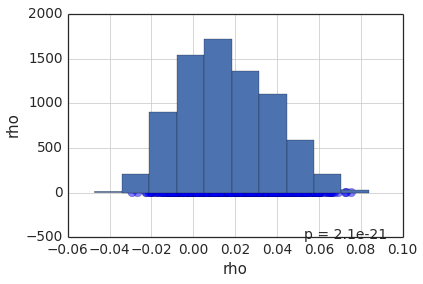

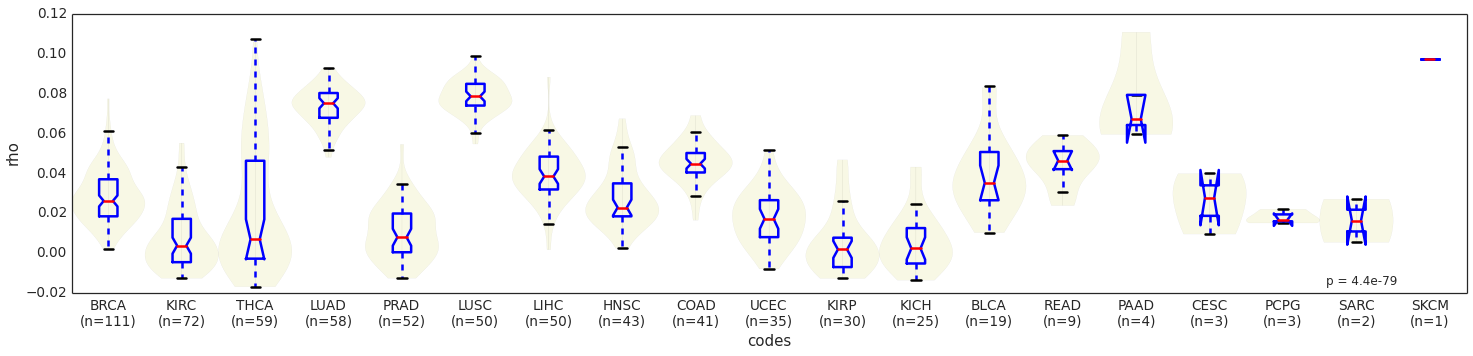

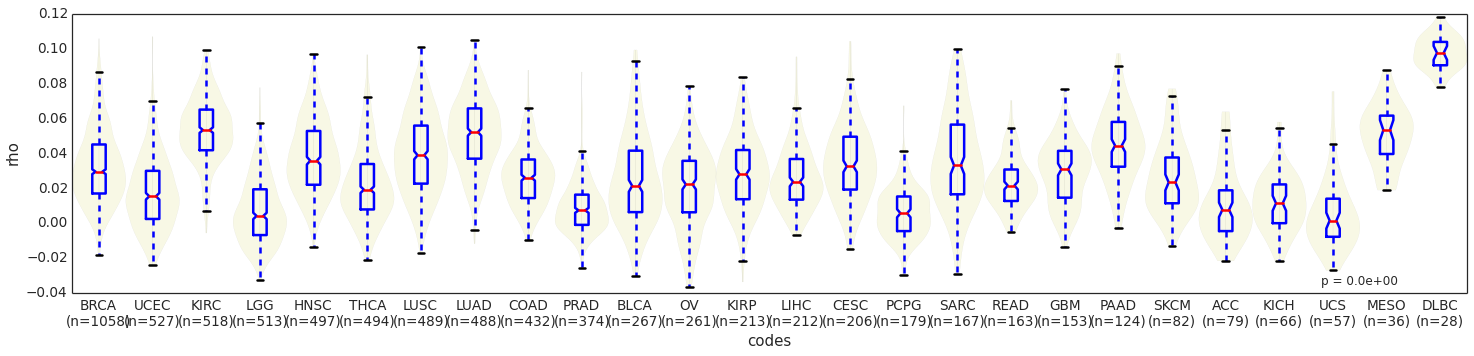

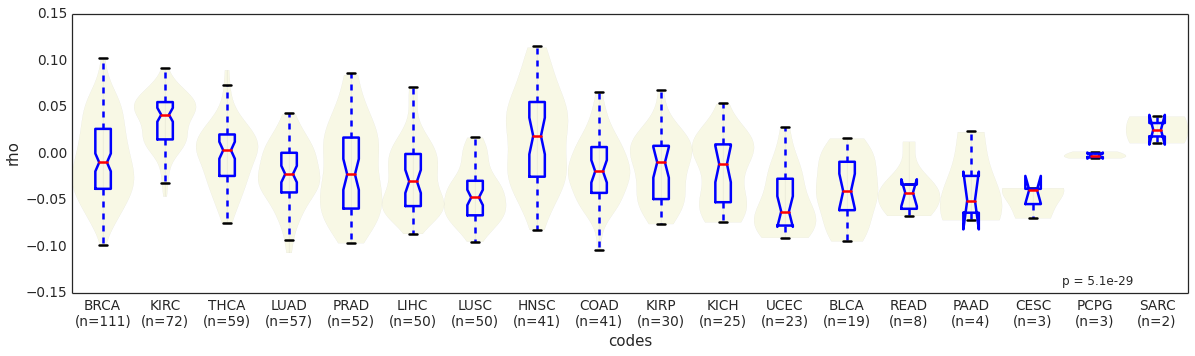

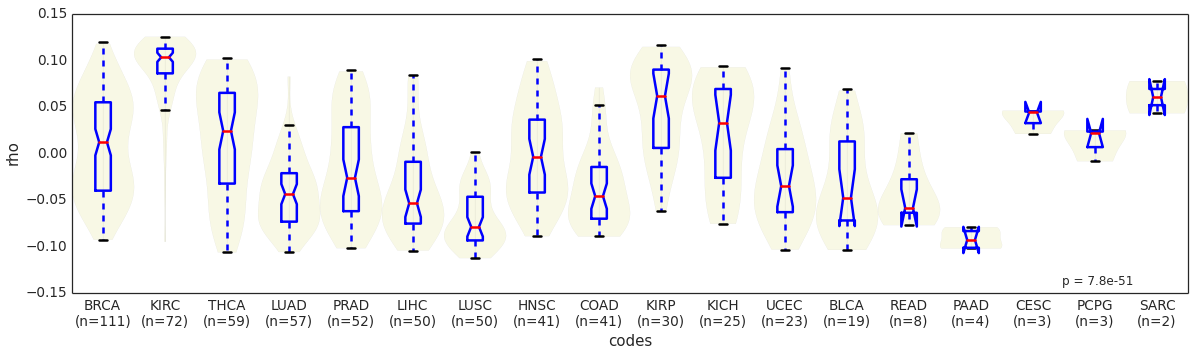

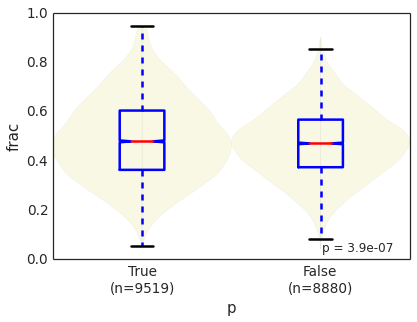

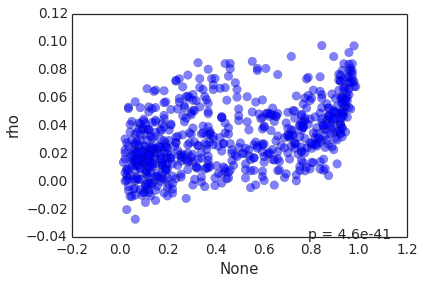

In [3]:
from Immune_Stroma_Scoring import *

In [4]:
vc = codes.ix[matched_rna.columns.get_level_values(0).unique()].value_counts()
vc.sum()

650

In [5]:
cancers = ti(vc > 40)

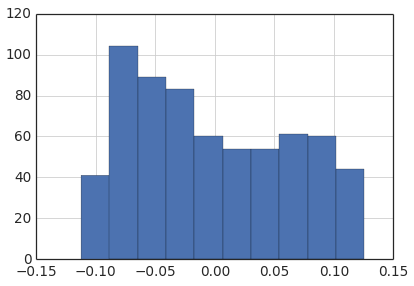

In [99]:
immune_score_dx.hist()

In [6]:
pd.DataFrame({c: spearman_pandas(rr.p, t_h[c] - t_m[c]) for c in cancers}).T.sort('p')

,rho,p
LUSC,0.12,1.42e-58
KIRC,-0.10,2.45e-43
LIHC,0.05,1.33e-12
COAD,0.05,1.42e-10
LUAD,0.04,1.51e-07
BRCA,-0.03,2.40e-05
HNSC,-0.03,2.64e-05
PRAD,-0.03,1.68e-04
THCA,0.03,4.64e-04


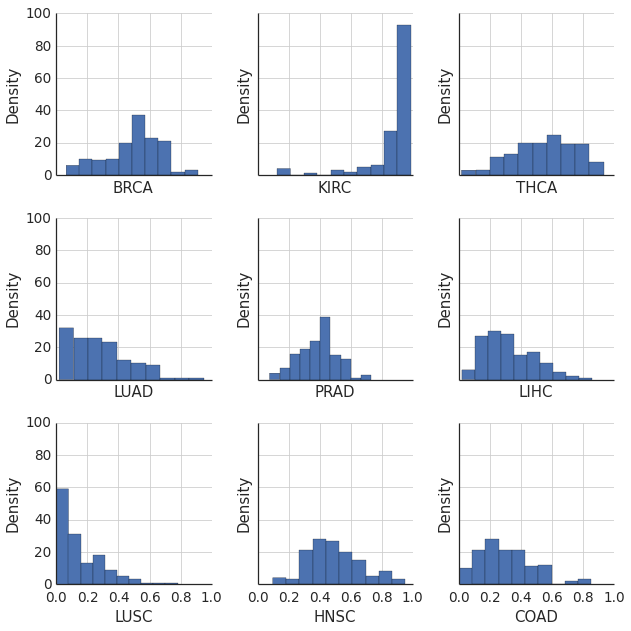

In [7]:
#Do not import
fig, axs = subplots(3,3, figsize=(9,9), sharex=True, sharey=True)
axs = axs.flatten()
for i,c in enumerate(cancers):
    ax = axs[i]
    s1, s2 = match_series(t_h[c].dropna(), t_m[c].dropna())
    s1.ix[ti(immune>0)].hist(bins=10, ax=ax)
    ax.set_xlabel(c)
    ax.set_ylabel('Density');
sns.despine(fig)
fig.tight_layout()

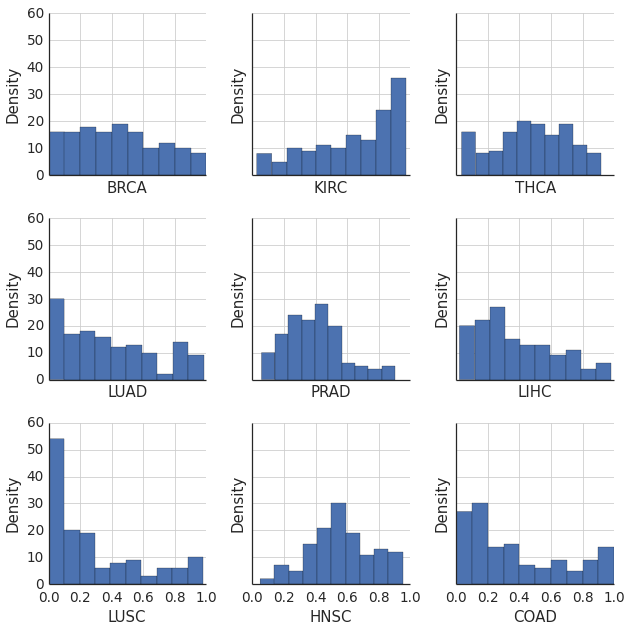

In [8]:
#Do not import
fig, axs = subplots(3,3, figsize=(9,9), sharex=True, sharey=True)
axs = axs.flatten()
for i,c in enumerate(cancers):
    ax = axs[i]
    s1, s2 = match_series(t_h[c].dropna(), t_m[c].dropna())
    s1.ix[ti(stromal>0)].hist(bins=10, ax=ax)
    ax.set_xlabel(c)
    ax.set_ylabel('Density');
sns.despine(fig)
fig.tight_layout()

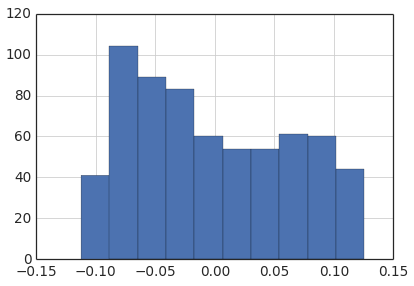

In [9]:
immune_score_dx.hist()

In [47]:
m2 = matched_tn.ix[:, ti(immune_score_dx < 0)]

dx2 = {c: dx_group(codes==c, m2) for c in cancers}
dx2 = pd.concat(dx2, axis=1)
dx2 = dx2.ix[dx_rna.index]

In [48]:
t_m2 = dx2.xs(('miss','frac'), axis=1, level=[1,2])
t_h2 = dx2.xs(('hit','frac'), axis=1, level=[1,2])
num_dx2 = dx2.xs(('hit','num_dx'), axis=1, level=[1,2])
t_m2 = t_m2.mask(num_dx < 10)

In [49]:
c = 'BRCA'
s1, s2 = match_series(t_h2[c].dropna(), t_m2[c].dropna())

In [60]:
v = pd.read_table('http://www.stat.berkeley.edu/~johann/ruv/resources/hk.txt',
                  header=None)
housekeeping = pd.Series(1, list(v[0])).ix[dx_rna.index].fillna(0)

In [66]:
dx_rna.ix[ti(housekeeping>0)].sort('p').head()

,num_ox,num_dx,frac,p
FOXM1,617,650,0.95,1.53e-140
UBE2I,571,650,0.88,6.57e-93
NME1,566,650,0.87,1.07e-88
MAZ,564,650,0.87,4.70e-87
ATXN2L,563,650,0.87,3.06e-86


In [72]:
lengths = pd.read_csv('/cellar/users/agross/Data/GeneSets/coding_lengths.csv',
                      header=None, squeeze=True, index_col=0)

(1500, 6000)

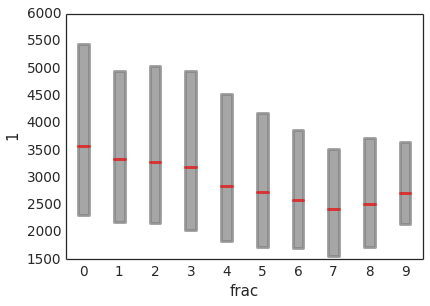

In [96]:
box_plot_pandas(np.floor(dx_rna.frac * 10.), lengths.clip(500,10000),
                  order=range(10))
plt.ylim(1500,6000)

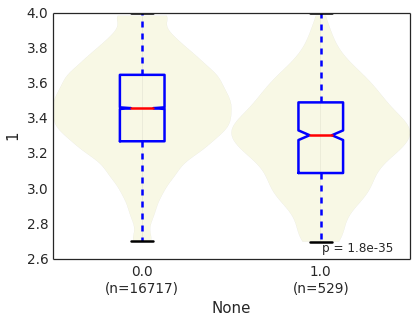

In [86]:
violin_plot_pandas(housekeeping, np.log10(lengths.clip(500,10000)))

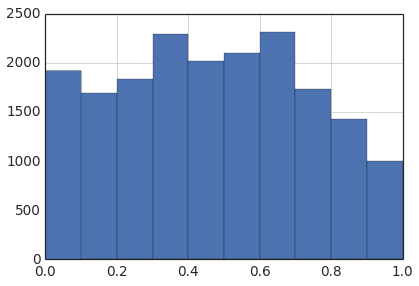

In [50]:
s1.hist()

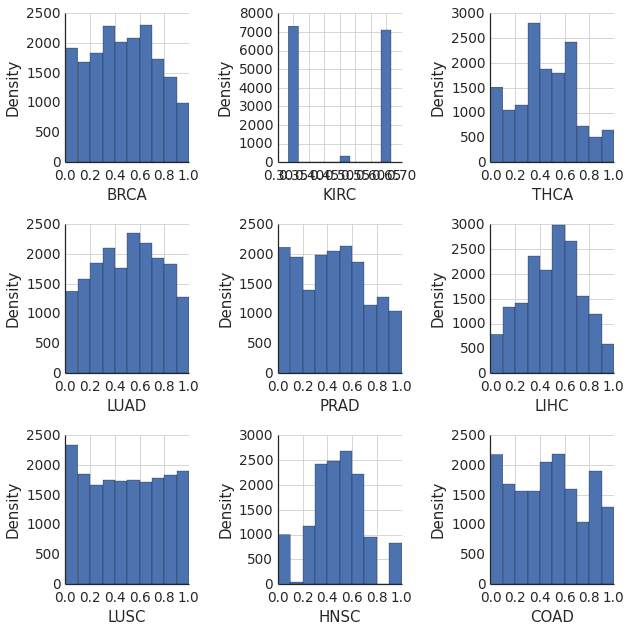

In [51]:
#Do not import
fig, axs = subplots(3,3, figsize=(9,9), sharex=False, sharey=False)
axs = axs.flatten()
for i,c in enumerate(cancers):
    try:
        ax = axs[i]
        s1, s2 = match_series(t_h2[c].dropna(), t_m2[c].dropna())
        s1.hist(bins=10, ax=ax)
        ax.set_xlabel(c)
        ax.set_ylabel('Density');
    except:
        print c
sns.despine(fig)
fig.tight_layout()

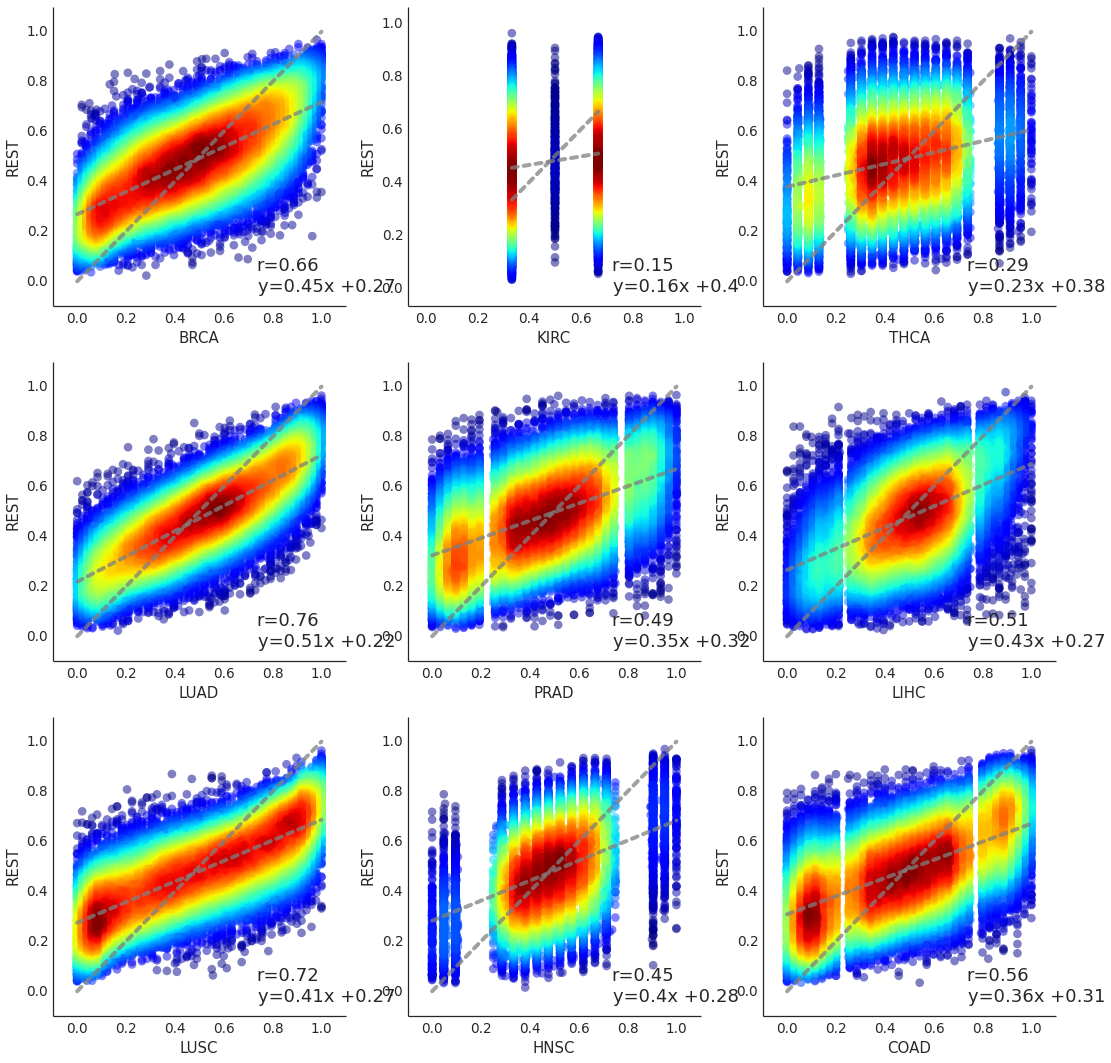

In [52]:
#Do not import
fig, axs = subplots(3,3, figsize=(15,15), sharex=False, sharey=False)
axs = axs.flatten()
for i,c in enumerate(cancers):
    try:
        ax = axs[i]
        s1, s2 = match_series(t_h2[c].dropna(), t_m2[c].dropna())
        fig, ax = init_ax(ax, figsize=(5, 5))
        plot_regression(s1, s2, density=True, rad=.1, ax=ax)

        ax.set_xlabel(c)
        ax.set_ylabel('REST');
    except:
        print c
sns.despine(fig)
fig.tight_layout()